# 6 Problemset 

**Instructions:** Fill in the missing code, which is marked by `# TODO`. Preferably run this notebook on a GPU. On Google Colab, you can do this by selecting Runtime > Change Runtime Type > Hardware Acceleration > GPU. Start by loading the necessary libraries as follows:



In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 6.4 Random overparameterized networks

Exlain what the following code does:

*   What does the plot show?

Ans: The plot shows 20 trials on random prediction models on the input space [-1, 1]

*   How does the initialization of the network parameters depend on the number $N$ of neurons?

Ans: The first layer consists of N neurons, each neuron is formulated as $y_i=\rho(a_ix+b_i)$. $\forall i$, $a_i$ is intialized with standard deviation 1, and $b_i$ is intialized with standard deviation 0.5. The second layer is formulated as: $z = \sum_{i=1}^{N}c_iy_i+d_i$. $\forall i$, $c_i$ is intialized with standard deviation $1/\sqrt{N}$, and $b_i$ is intialized with standard deviation 0.5. If N equals 1, then the each curve will be a piecewise linear function. The larger N is, more versatile .

*   What is the distribution of `model.predict([x])` for large $N$?

Ans: By CLT, it follow normal distribution.

2022-09-16 14:37:17.624725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


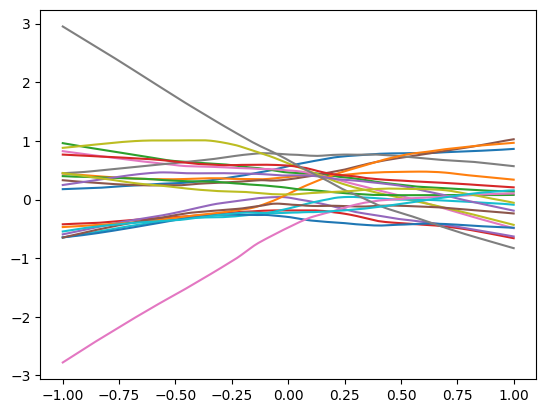

In [2]:
N=1000
fig, ax = plt.subplots()
for i in range(20):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000), verbose=0))

1. The plot shows 20 trials on random prediction models on the input space [-1, 1]
2. The first layer consists of N neurons, each neuron is formulated as $y_i=\rho(a_ix+b_i)$. $\forall i$, $a_i$ is intialized with standard deviation 1, and $b_i$ is intialized with standard deviation 0.5. The second layer is formulated as: $z = \sum_{i=1}^{N}c_iy_i+d_i$. $\forall i$, $c_i$ is intialized with standard deviation $1/\sqrt{N}$, and $b_i$ is intialized with standard deviation 0.5. If N equals 1, then the each curve will be a piecewise linear function. The larger N is, the smoother the curve is.
3. By CLT, it follow normal distribution.

## 6.5 Gradient flow of overparameterized networks

Explain what the following code does:

*   What does the plot show?

Ans: The plot shows the training process of the model. It records the fitting results every 100 epoch (from a total of 100 epochs)

*   The class `SaveWeights` saves the network weights during training. How does this work? 

Ans: The class creates a custom callback, and at certain epoch (marked by the step size of parameter 'interval'), save the current weight in the callback.

*   Investigate the dependence on the number $N$ of hidden neurons: how many epochs do you need to get convergence to a (hopefully) nice interpolant of the data points?

Ans: The following outputs shows some trails. From experiments, we notice that if $N$ is too low ($N \leq 1000$), the model lacks the ability structually,, and underfit the curve. However, if $N$ is too large ($N \geq 10000$), the model loses control and arrives at strange yet unrelated patterns. Experimentally speaking, thousands of nodes (e.g. 5000 or 6000) could interpolate the curve nicely.

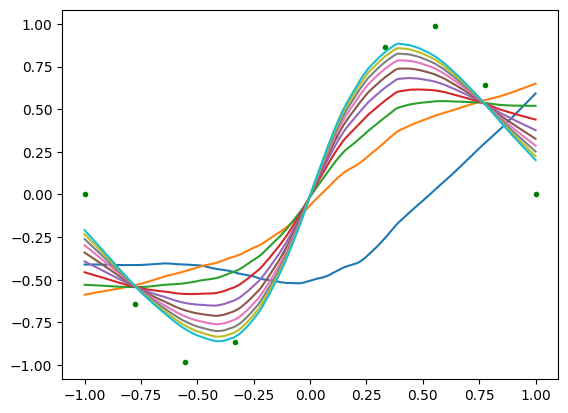

In [3]:
N=1000
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

x_train = np.linspace(-1, 1, 10)
y_train = np.sin(np.pi*x_train)
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(10)

class SaveWeights(tf.keras.callbacks.Callback):
  def __init__(self, interval=1):
    super(SaveWeights, self).__init__()
    self.interval = interval
    self.weights = []

  def on_epoch_end(self, epoch, logs=None):
    if epoch % self.interval == 1:
      self.weights.append(self.model.get_weights())

callback = SaveWeights(interval=100)

history = model.fit(data_train, epochs=1000, verbose=0, callbacks=[callback])

fig, ax = plt.subplots()
ax.plot(x_train, y_train, '.g')
for weights in callback.weights:
  model.set_weights(weights)
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000), verbose=0))

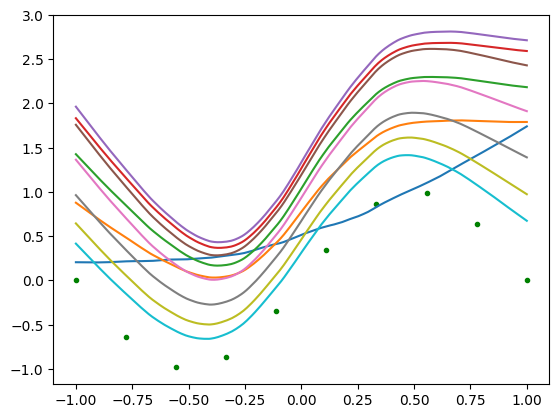

In [4]:
N=5000
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

x_train = np.linspace(-1, 1, 10)
y_train = np.sin(np.pi*x_train)
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(10)

class SaveWeights(tf.keras.callbacks.Callback):
  def __init__(self, interval=1):
    super(SaveWeights, self).__init__()
    self.interval = interval
    self.weights = []

  def on_epoch_end(self, epoch, logs=None):
    if epoch % self.interval == 1:
      self.weights.append(self.model.get_weights())

callback = SaveWeights(interval=100)

history = model.fit(data_train, epochs=1000, verbose=0, callbacks=[callback])

fig, ax = plt.subplots()
ax.plot(x_train, y_train, '.g')
for weights in callback.weights:
  model.set_weights(weights)
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000), verbose=0))

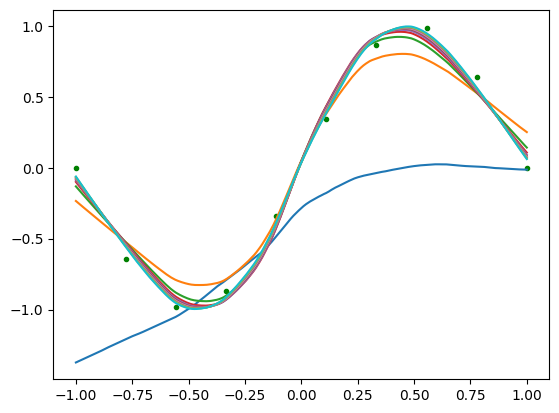

In [5]:
N=6000
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

x_train = np.linspace(-1, 1, 10)
y_train = np.sin(np.pi*x_train)
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(10)

class SaveWeights(tf.keras.callbacks.Callback):
  def __init__(self, interval=1):
    super(SaveWeights, self).__init__()
    self.interval = interval
    self.weights = []

  def on_epoch_end(self, epoch, logs=None):
    if epoch % self.interval == 1:
      self.weights.append(self.model.get_weights())

callback = SaveWeights(interval=100)

history = model.fit(data_train, epochs=1000, verbose=0, callbacks=[callback])

fig, ax = plt.subplots()
ax.plot(x_train, y_train, '.g')
for weights in callback.weights:
  model.set_weights(weights)
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000), verbose=0))

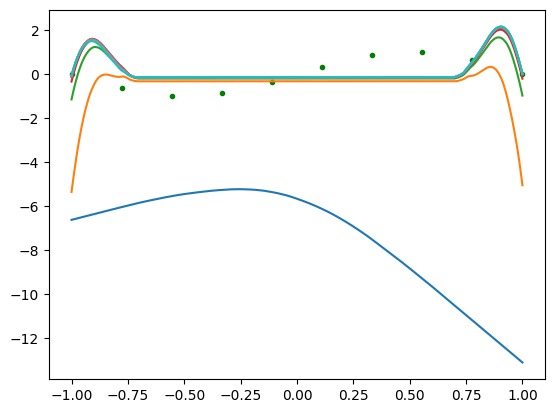

In [6]:
N=10000
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

x_train = np.linspace(-1, 1, 10)
y_train = np.sin(np.pi*x_train)
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(10)

class SaveWeights(tf.keras.callbacks.Callback):
  def __init__(self, interval=1):
    super(SaveWeights, self).__init__()
    self.interval = interval
    self.weights = []

  def on_epoch_end(self, epoch, logs=None):
    if epoch % self.interval == 1:
      self.weights.append(self.model.get_weights())

callback = SaveWeights(interval=100)

history = model.fit(data_train, epochs=1000, verbose=0, callbacks=[callback])

fig, ax = plt.subplots()
ax.plot(x_train, y_train, '.g')
for weights in callback.weights:
  model.set_weights(weights)
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000), verbose=0))

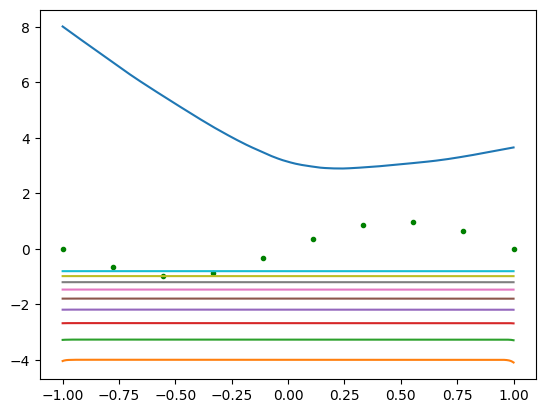

In [7]:
N=20000
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

x_train = np.linspace(-1, 1, 10)
y_train = np.sin(np.pi*x_train)
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(10)

class SaveWeights(tf.keras.callbacks.Callback):
  def __init__(self, interval=1):
    super(SaveWeights, self).__init__()
    self.interval = interval
    self.weights = []

  def on_epoch_end(self, epoch, logs=None):
    if epoch % self.interval == 1:
      self.weights.append(self.model.get_weights())

callback = SaveWeights(interval=100)

history = model.fit(data_train, epochs=1000, verbose=0, callbacks=[callback])

fig, ax = plt.subplots()
ax.plot(x_train, y_train, '.g')
for weights in callback.weights:
  model.set_weights(weights)
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000), verbose=0))

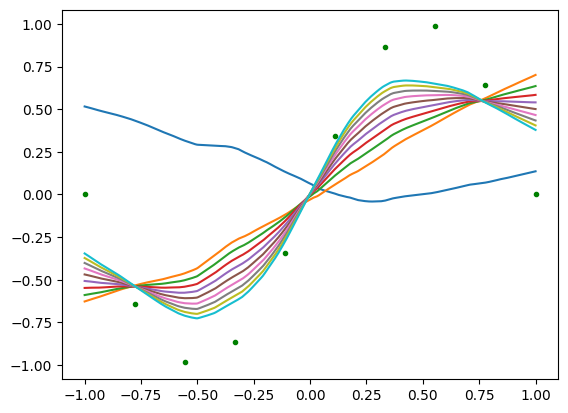

In [8]:
N=500
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

x_train = np.linspace(-1, 1, 10)
y_train = np.sin(np.pi*x_train)
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(10)

class SaveWeights(tf.keras.callbacks.Callback):
  def __init__(self, interval=1):
    super(SaveWeights, self).__init__()
    self.interval = interval
    self.weights = []

  def on_epoch_end(self, epoch, logs=None):
    if epoch % self.interval == 1:
      self.weights.append(self.model.get_weights())

callback = SaveWeights(interval=100)

history = model.fit(data_train, epochs=1000, verbose=0, callbacks=[callback])

fig, ax = plt.subplots()
ax.plot(x_train, y_train, '.g')
for weights in callback.weights:
  model.set_weights(weights)
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000), verbose=0))

## 6.6 Expected risk of overparameterized networks

For the learning task in 6.5, 

*   Create a test dataset

Ans: a dataset with $y=x^2$ is created

*   Plot the training loss and test loss of the trained network as a function over the number $N$ of hidden neurons.
Ans: see the plot from below

*   What's a good choice of $N$? What does the theory say, and what do you see in practice?

Ans: A good choice of $N$ would be around 2000 to 3000. In practice, thousands of neurons leads to overflow and failed to predict the correct model. The optimal is within hundreds of neurons (somewhere wround 300 neurons).

In [ ]:
x_train = np.linspace(-1, 1, 10)
y_train = np.sin(np.pi*x_train)
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(10)

x_test = np.linspace(-0.9, 0.9, 10)
y_test = np.sin(np.pi*x_test)

N_choice = np.concatenate((np.arange(50, 500, 50), np.arange(500, 10000, 1000)))
loss = []
loss_test = []
for N in N_choice:

  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  model.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError())
  history = model.fit(data_train, epochs=30, verbose = 0)

  loss.append(history.history["loss"][29])
  y_pred = model.predict(x_test, verbose = 0)
  test_error = np.square(np.subtract(y_test, y_pred)).mean()
  loss_test.append(test_error)

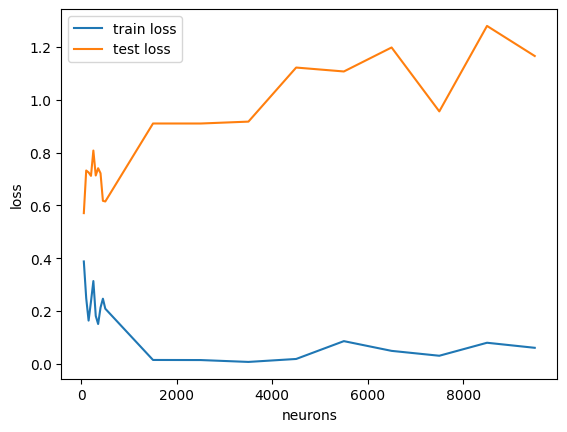

In [10]:
plt.plot(N_choice, loss, label = 'train loss')
plt.plot(N_choice, loss_test, label = 'test loss')
plt.xlabel('neurons')
plt.ylabel('loss')
plt.legend()
plt.show()